In [1]:
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [27]:
data = ca.read_netcdf('/run/media/arturo/Arturo/Data/IMERG/IMERG_2000_12_2021_02_1mo_05x05.nc',2)
lat = data['lat']
lon = data['lon']
pre = data['pre']

nlat = len(lat)
nlon = len(lon) 

lon2d, lat2d = np.meshgrid(lon, lat)

time : (243,)
lon : (110,)
lat : (120,)
pre : (243, 120, 110)


In [3]:
pre_dic = ca.data_dictionary(pre)


Keys level 1:  dict_keys(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dec'])
keys level 2:  dict_keys(['data', 'clim', 'anom'])

Numbers of years:  20
Numbers of months:  243


In [25]:
jan = pre_dic['jan']['anom']
feb = pre_dic['feb']['anom']
dec = pre_dic['dec']['anom']

summer = None
for t in range(20):

    jan_tmp = jan[t,:,:]
    feb_tmp = feb[t,:,:]
    dec_tmp = dec[t,:,:]

    if summer is None:
        summer = np.zeros([60,nlat,nlon])

    summer[3*t,:,:] = jan_tmp
    summer[3*t+1,:,:] = feb_tmp
    summer[3*t+2,:,:] = dec_tmp

summer.shape

(60, 120, 110)

In [26]:
data = ca.read_netcdf('/home/arturo/Github/Complex-Network-AS/import/IMERG/season/summer/IMERG_2000_12_2021_02_1mo_05x05_anom_summer.nc',2)
anom = data['pre']

time : (63,)
lon : (110,)
lat : (120,)
pre : (63, 120, 110)


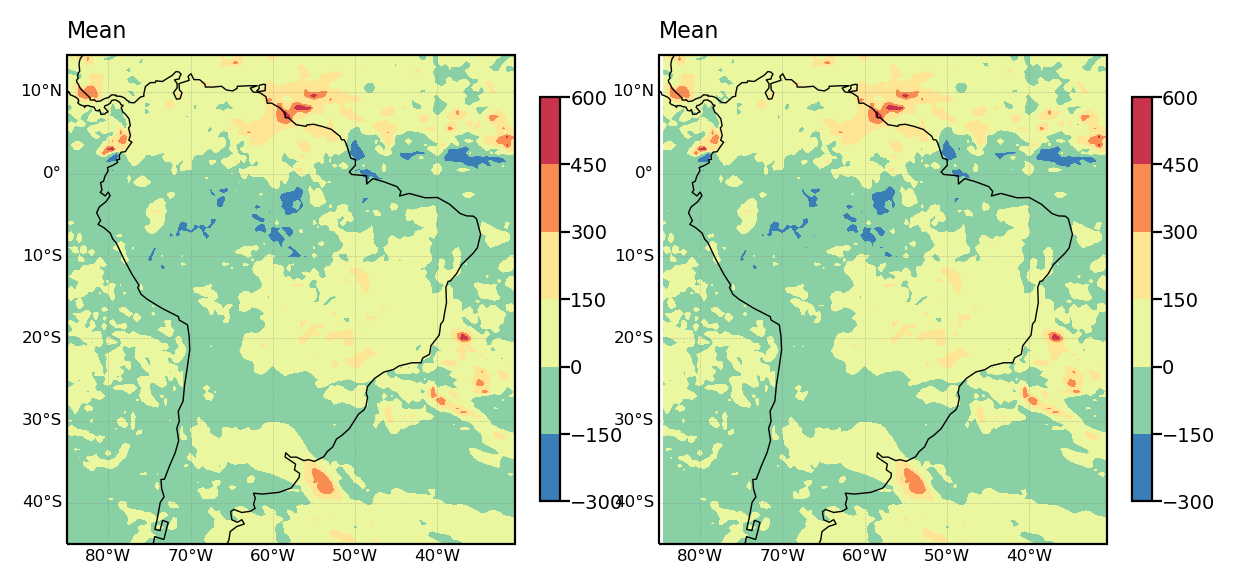

In [47]:
t = 13

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
levels = None

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,summer[t,:,:],cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d,anom[t,:,:],cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)